# Comparison of several result

In [ ]:
import sys
sys.path.append(r"C:/Users/Matthieu/Documents/_Travail/Stages/Stage M1/Workspace/cooperation_emergence/")

from utils import parse_parameters
from plot import plot_evolution, plot_histogram, plot_one_histogram, plot_randomized_evolution
from analysis import histogram, measure, estimate_etas_with_L, compute_xhi, compute_xhi_ratio, compute_xhi_mean
from operation import OperationStack
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from animation import Animation
import os

In [38]:
list_of_dir = [
    r"./out/RTH_E3O2P21R12T17_Empty_L10_C750_S75_T0.25/",
    r"./out/RTH_E3O2P21R12T17_3Groups_L10_C750_S75_T0.25/",
    r"./out/RTH_E3O2P21R12T17_Random_L10_C750_S75_T0.25/",
    r"./out/RTH_R1_Empty_L10_C750_S75_T0/"
]
labels = ["Empty", "3 Groups", "Random init", "Random network"]
colors = plt.cm.viridis(np.linspace(0,1,len(labels)-1))
linestyles = ["solid", "solid", "solid", "dashed"]
parameters_list = []
oper_list = []
for i in range(len(list_of_dir)):
    parameters_list.append(parse_parameters(list_of_dir[i] + "parameters.yaml"))
    oper_list.append(OperationStack(list_of_dir[i]))

#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(labels))))

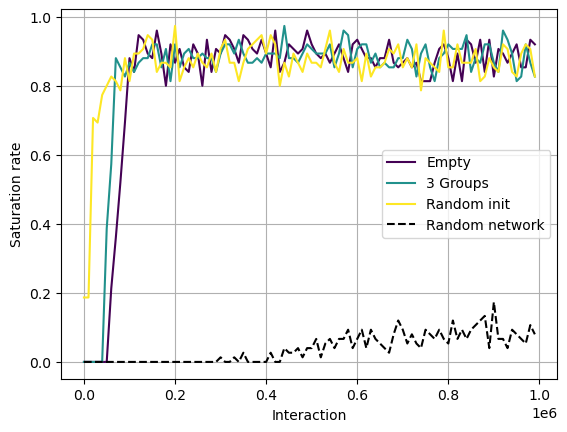

In [39]:
ax = plt.subplot(1, 1, 1)
for i in range(len(oper_list)):
    if i == len(labels) - 1:
        color = "k"
    else:
        color = colors[i]
    plot_evolution(ax, "Saturation rate", oper_list[i], 0, 1000000, 10000, parameters_list[i], label=labels[i], color=color, linestyle=linestyles[i])
plt.legend()
plt.grid()
#plt.show()
plt.savefig("./plot/INITeffect_RTH_saturation.png")

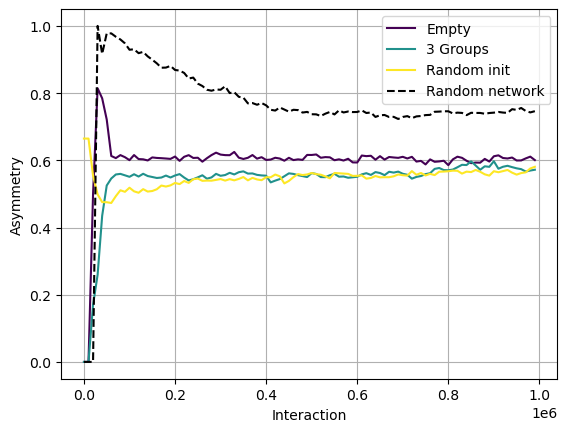

In [40]:
ax = plt.subplot(1, 1, 1)
for i in range(len(oper_list)):
    if i == len(labels) - 1:
        color = "k"
    else:
        color = colors[i]
    plot_evolution(ax, "Asymmetry", oper_list[i], 0, 1000000, 10000, parameters_list[i], label=labels[i], color=color, linestyle=linestyles[i])

plt.legend()
plt.grid()
plt.savefig("./plot/INITeffect_RTH_asymmetry.png")

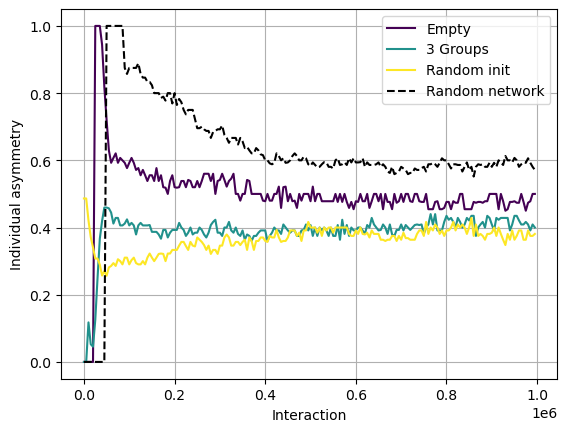

In [41]:
ax = plt.subplot(1, 1, 1)
for i in range(len(oper_list)):
    if i == len(labels) - 1:
        color = "k"
    else:
        color = colors[i]
    plot_evolution(ax, "Individual asymmetry", oper_list[i], 0, 1000000, 5000, parameters_list[i], label=labels[i], color=color, linestyle=linestyles[i])

plt.legend()
plt.grid()
plt.savefig("./plot/INITeffect_RTH_individual_asymmetry.png")

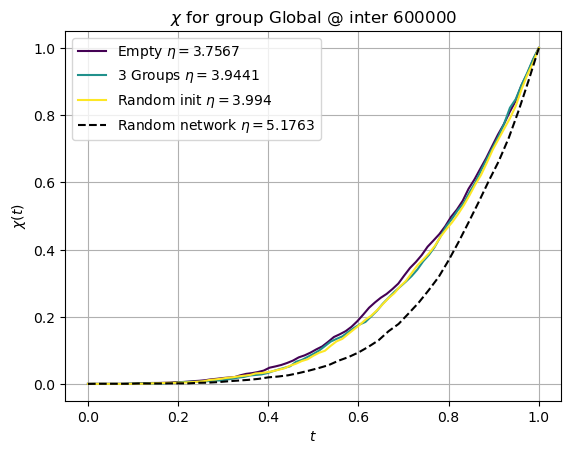

In [42]:
selector = "Global"
inter = 600000
ax = plt.subplot(1, 1, 1)
for i in range(len(oper_list)):
    oper = oper_list[i]
    trusti, _ = oper.resolve(inter)
    xhi_mean = compute_xhi_mean(trusti, parameters_list[i], ph_selector=selector)
    size = xhi_mean.size
    t = np.arange(size)
    t_norm = t/(size-1)
    model = lambda i, eta:  (np.exp(eta * i / (size-1)) - 1) / (np.exp(eta) - 1)
    popt, _ = curve_fit(model, t, xhi_mean)
    full_label = labels[i] + " $\eta = {}$".format(round(popt[0], 4))
    if i == len(labels) - 1:
        color = "k"
    else:
        color = colors[i]
    ax.plot(t_norm, xhi_mean, label=full_label, linestyle=linestyles[i], color=color)
ax.set(
    xlabel="$t$",
    ylabel="$\chi(t)$",
    title="$\chi$ for group {0} @ inter {1}".format(selector, inter)
)
plt.legend()
plt.grid()
plt.savefig("./plot/INITeffect_RTH_xhi.png")
#plt.show()
